In [ ]:
 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [ ]:
# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [61]:
# Reading whale returns
whale_returns_data = Path("Resources/whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_data, infer_datetime_format = True, parse_dates = True )

In [62]:
# Changing to "df" to concat csv
whale_returns_df = whale_returns_data
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [63]:
# Count nulls
whale_returns_df.isnull().count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [64]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()

In [65]:
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [66]:
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [ ]:
## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [39]:
# Reading algorithmic returns
algo_returns_data = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_data, infer_datetime_format = True, parse_dates = True )

In [40]:
# Changing to "df" to concat csv
algo_returns_df = algo_returns_data
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [41]:
# Count nulls
algo_returns_df.isnull().count()

Date      1241
Algo 1    1241
Algo 2    1241
dtype: int64

In [42]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()

In [43]:
# Set the 'Date' as Index
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [44]:
# Drop extra 'Date' column
algo_returns_df = algo_returns_df.drop(columns=['Date'])
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [45]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_data, infer_datetime_format = True, parse_dates = True )
sp500_history_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [46]:
# Check Data Types
sp500_history_df.dtypes

Date     object
Close    object
dtype: object

In [47]:
sp500_history_df.describe(include='all')

,Date,Close
count,1649,1649
unique,1649,1639
top,19-Nov-18,$2066.66
freq,1,2


In [48]:
# Fix Data Types
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [49]:
#Drop extra 'Date' column
sp500_history_df = sp500_history_df.drop(columns=['Date'])
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [50]:
# Get rid of '$' to change from object to float
sp500_history_df['Close'] = pd.to_numeric(sp500_history_df['Close'].str.replace('$', ''),)

In [51]:
sp500_history_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [22]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [52]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_history_df.pct_change()
sp500_daily_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [53]:
# Drop nulls
sp500_daily_returns_df.isnull().count()

Close    1649
dtype: int64

In [54]:
sp500_daily_returns_df = sp500_daily_returns_df.dropna().copy()

In [55]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns_df = sp500_daily_returns_df.rename(columns={"Close":"SP500"})

In [56]:
sp500_daily_returns_df

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [57]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [67]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [ ]:
## Combine Whale, Algorithmic, and S&P 500 Returns

In [68]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
column_appened_data = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns_df], axis="columns", join="inner")
column_appened_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [81]:
# Conduct Quantitative Analysis

#In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

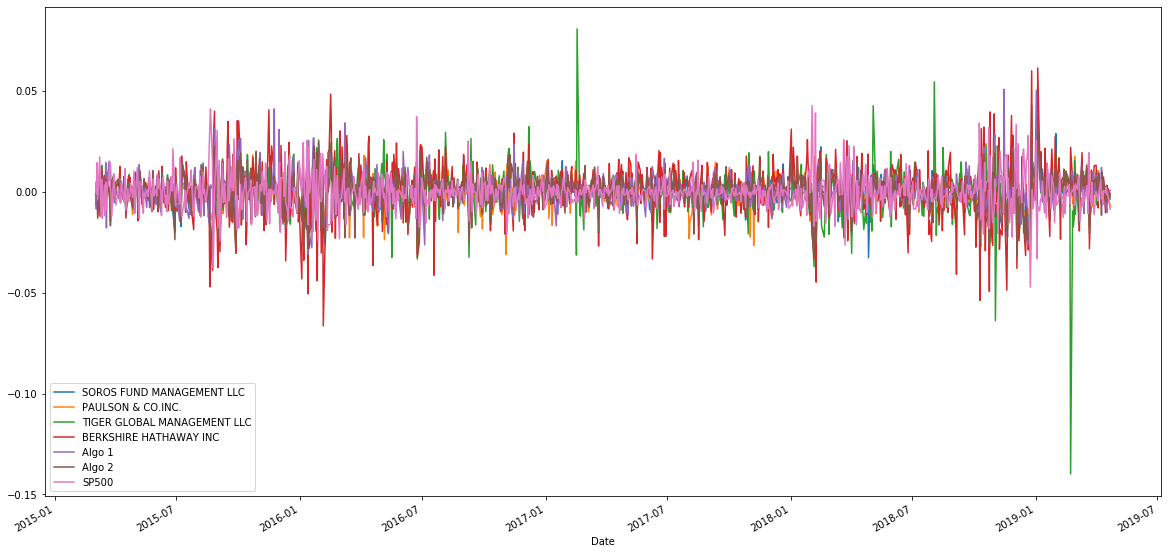

In [75]:
# Plot daily returns of all portfolios
column_appened_data.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

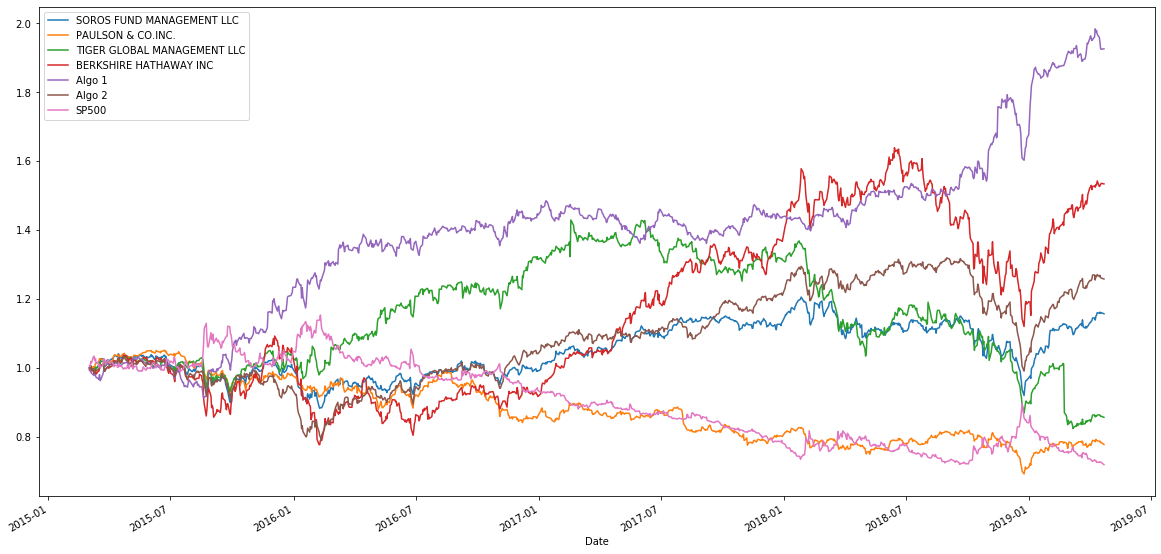

In [74]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + column_appened_data).cumprod() 
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

In [ ]:
---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


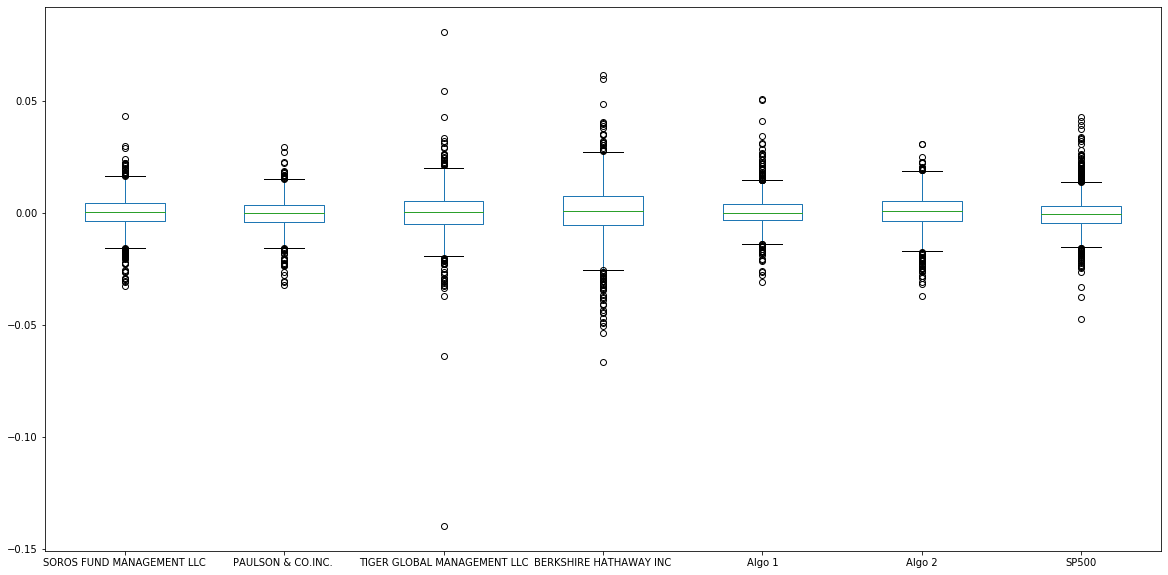

In [73]:
# Box plot to visually show risk
column_appened_data.plot.box(figsize=(20,10))

In [ ]:
### Calculate Standard Deviations

In [78]:
# Calculate the daily standard deviations of all portfolios
daily_std = column_appened_data.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

In [ ]:
### Determine which portfolios are riskier than the S&P 500

In [79]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns_df.std()
sp500_daily_std
# Determine which portfolios are riskier than the S&P 500
## Tiger Global Management LLC & Berkshire Hathaway Inc

SP500    0.008135
dtype: float64

In [ ]:
### Calculate the Annualized Standard Deviation

In [81]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

In [82]:
# Annualized standard deviation for SP500
annualized_sp500_std = sp500_daily_std * np.sqrt(252)
annualized_sp500_std

SP500    0.129133
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

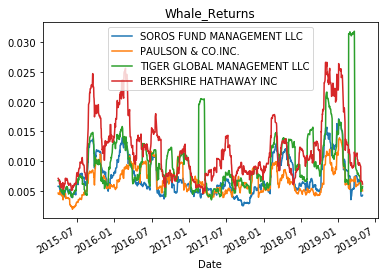

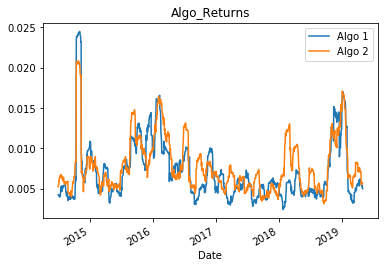

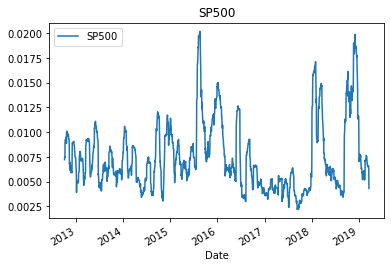

In [83]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_returns_df.rolling(window=21).std()
algo_returns_df.rolling(window=21).std()
sp500_daily_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
whale_returns_df.rolling(window=21).std().plot(title = "Whale_Returns")
algo_returns_df.rolling(window=21).std().plot(title = "Algo_Returns")
sp500_daily_returns_df.rolling(window=21).std().plot(title = "SP500")

In [ ]:
### Calculate and plot the correlation

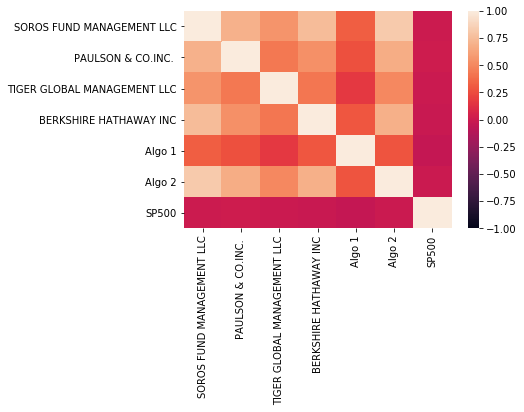

In [84]:
# Calculate the correlation
correlation = column_appened_data.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

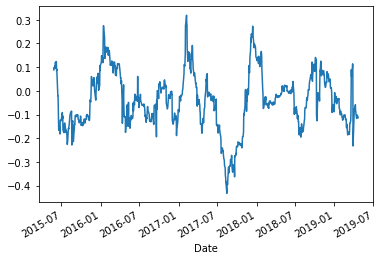

In [89]:
# Calculate covariance of a single portfolio
covariance_algo = column_appened_data["Algo 1"].rolling(window=60).cov(column_appened_data["SP500"])
covariance_algo
# Calculate variance of S&P 500
variance_sp500 = column_appened_data["SP500"].rolling(window=60).var()
variance_sp500
# Computing beta
algo_beta = covariance_algo / variance_sp500
# Plot beta trend
algo_beta.plot()

In [ ]:
## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

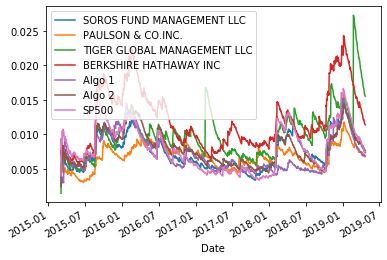

In [91]:
# Use `ewm` to calculate the rolling window
moving_average = column_appened_data.ewm(halflife=21).std().plot()
    

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Annualized Sharpe Ratios
sharpe_ratios = (column_appened_data.mean() * 252) / (column_appened_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

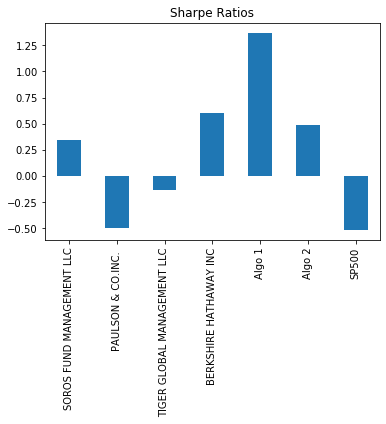

In [93]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here! Algo 1 outperforms the whale and s&p 500 portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [136]:
# Reading data from 1st stock
appb_historical_data = Path("Resources/appb_historical.csv")
appb_historical_df = pd.read_csv(appb_historical_data, infer_datetime_format = True, parse_dates = True)
appb_historical_df.head()

,Date,Close
0,1/21/2020,0.35
1,1/22/2020,0.35
2,1/23/2020,0.35
3,1/27/2020,0.35
4,1/28/2020,0.35


In [137]:
appb_historical_df = appb_historical_df.set_index("Date")
appb_historical_df

,Close
Date,
1/21/2020,0.35
1/22/2020,0.35
1/23/2020,0.35
1/27/2020,0.35
1/28/2020,0.35
...,...
1/4/2021,0.42
1/5/2021,0.00
1/6/2021,0.00


In [138]:
# Reading data from 2nd stock
dltr_historical_data = Path("Resources/dltr_historical.csv")
dltr_historical_df = pd.read_csv(dltr_historical_data, infer_datetime_format = True, parse_dates = True)
dltr_historical_df.head()

,Date,Close
0,1/21/2020,89.50
1,1/22/2020,89.87
2,1/23/2020,87.94
3,1/24/2020,87.71
4,1/27/2020,88.40


In [139]:
dltr_historical_df = dltr_historical_df.set_index("Date")
dltr_historical_df

,Close
Date,
1/21/2020,89.50
1/22/2020,89.87
1/23/2020,87.94
1/24/2020,87.71
1/27/2020,88.40
...,...
1/11/2021,112.43
1/12/2021,114.18
1/13/2021,112.47


In [140]:
# Reading data from 3rd stock
pzza_historical_data = Path("Resources/pzza_historical.csv")
pzza_historical_df = pd.read_csv(pzza_historical_data, infer_datetime_format = True, parse_dates = True)
pzza_historical_df.head()

,Date,Close
0,1/21/2020,64.50
1,1/22/2020,66.14
2,1/23/2020,66.92
3,1/24/2020,66.53
4,1/27/2020,64.94


In [141]:
pzza_historical_df = pzza_historical_df.set_index("Date")
pzza_historical_df

,Close
Date,
1/21/2020,64.50
1/22/2020,66.14
1/23/2020,66.92
1/24/2020,66.53
1/27/2020,64.94
...,...
1/11/2021,93.33
1/12/2021,94.14
1/13/2021,93.76


In [142]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([appb_historical_df, dltr_historical_df, pzza_historical_df], axis="columns", join="inner")
combined_df

,Close,Close,Close
Date,,,
1/21/2020,0.35,89.50,64.50
1/22/2020,0.35,89.87,66.14
1/23/2020,0.35,87.94,66.92
1/27/2020,0.35,88.40,64.94
1/28/2020,0.35,86.76,66.05
...,...,...,...
1/4/2021,0.42,106.94,85.34
1/5/2021,0.00,107.13,90.18
1/6/2021,0.00,112.97,93.40


In [ ]:
# Reset Date index


In [143]:
# Reorganize portfolio data by having a column per symbol
columns=["APPB","DLTR","PZZA"]
combined_df.columns = columns
combined_df.head()

,APPB,DLTR,PZZA
Date,,,
1/21/2020,0.35,89.50,64.50
1/22/2020,0.35,89.87,66.14
1/23/2020,0.35,87.94,66.92
1/27/2020,0.35,88.40,64.94
1/28/2020,0.35,86.76,66.05


In [144]:
# Calculate daily returns
daily_returns = combined_df.pct_change()
# Drop NAs
daily_returns.dropna().copy()
# Display sample data
daily_returns.head()

,APPB,DLTR,PZZA
Date,,,
1/21/2020,NaN,NaN,NaN
1/22/2020,0.0,0.004134,0.025426
1/23/2020,0.0,-0.021475,0.011793
1/27/2020,0.0,0.005231,-0.029588
1/28/2020,0.0,-0.018552,0.017093


In [ ]:
## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [145]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
1/21/2020         NaN
1/22/2020    0.009853
1/23/2020   -0.003227
1/27/2020   -0.008119
1/28/2020   -0.000486
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [146]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([daily_returns, portfolio_returns], axis="columns", join="inner")
joined_df.head()

,APPB,DLTR,PZZA,0
Date,,,,
1/21/2020,NaN,NaN,NaN,NaN
1/22/2020,0.0,0.004134,0.025426,0.009853
1/23/2020,0.0,-0.021475,0.011793,-0.003227
1/27/2020,0.0,0.005231,-0.029588,-0.008119
1/28/2020,0.0,-0.018552,0.017093,-0.000486


In [147]:
#Rename Columns
columns=["APPB","DLTR","PZZA", "Portfolio Returns"]
joined_df.columns = columns
joined_df.head()

,APPB,DLTR,PZZA,Portfolio Returns
Date,,,,
1/21/2020,NaN,NaN,NaN,NaN
1/22/2020,0.0,0.004134,0.025426,0.009853
1/23/2020,0.0,-0.021475,0.011793,-0.003227
1/27/2020,0.0,0.005231,-0.029588,-0.008119
1/28/2020,0.0,-0.018552,0.017093,-0.000486


In [148]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df = joined_df.dropna().copy()
joined_df.head()

,APPB,DLTR,PZZA,Portfolio Returns
Date,,,,
1/22/2020,0.000000,0.004134,0.025426,0.009853
1/23/2020,0.000000,-0.021475,0.011793,-0.003227
1/27/2020,0.000000,0.005231,-0.029588,-0.008119
1/28/2020,0.000000,-0.018552,0.017093,-0.000486
1/30/2020,-0.028571,0.009797,-0.009235,-0.009337


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [149]:
# Calculate the annualized `std`
daily_std = daily_returns.std()
daily_std

APPB         NaN
DLTR    0.040933
PZZA    0.052174
dtype: float64

In [150]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

APPB         NaN
DLTR    0.649798
PZZA    0.828238
dtype: float64

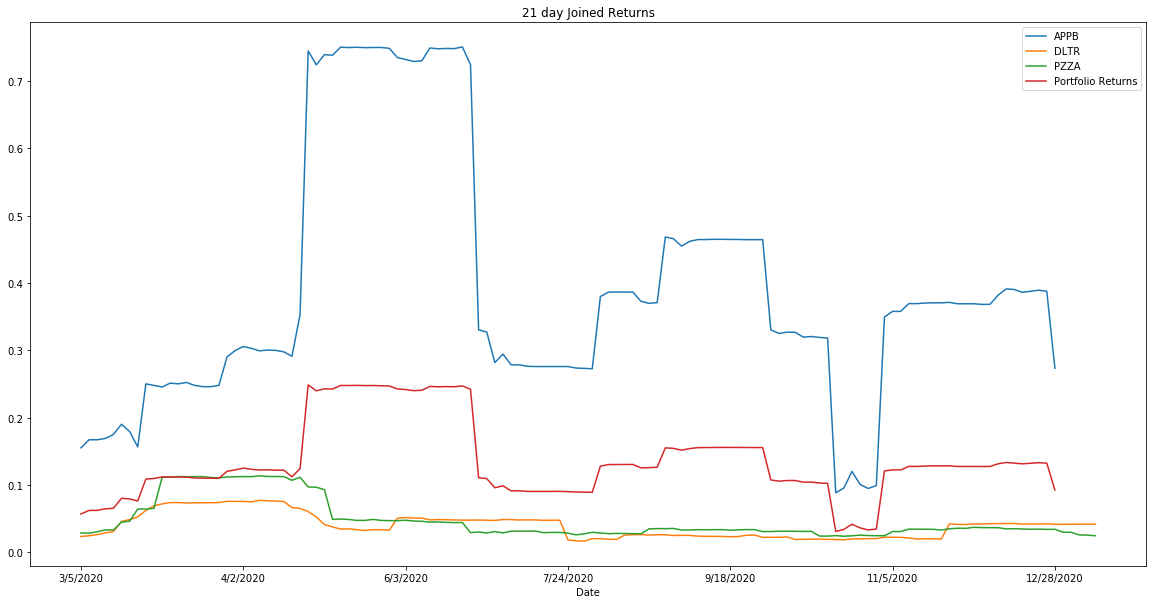

In [151]:
### Calculate and plot rolling `std` with 21-day window
joined_df.rolling(window=21).std().plot(figsize=(20,10), title= "21 day Joined Returns")

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

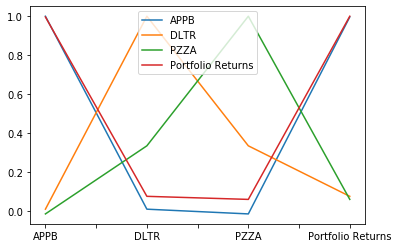

In [152]:
# Calculate and plot the correlation
correlation = joined_df.corr().plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [153]:
#Calculate then Concat SP500 returns to the portfolio
#sp500_history_data = Path("Resources/sp500_history.csv")
#sp500_history_df = pd.read_csv(sp500_history_data, infer_datetime_format = True, parse_dates = True )
#sp500_history_df.head()
#sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
#sp500_history_df.head()
#sp500_history_df = sp500_history_df.drop(columns=['Date'])
#sp500_history_df.head()
#sp500_history_df['Close'] = pd.to_numeric(sp500_history_df['Close'].str.replace('$', ''),)
#sp500_daily_returns_df = sp500_history_df.pct_change()
#sp500_daily_returns_df.head()
#sp500_daily_returns_df = sp500_daily_returns_df.dropna().copy()
#sp500_daily_returns_df = sp500_daily_returns_df.rename(columns={"Close":"SP500"})
#sp500_daily_returns_df.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [155]:
#together_df = pd.concat([joined_df, sp500_daily_returns_df], axis="columns", join="inner")
#together_df

,APPB,DLTR,PZZA,Portfolio Returns,SP500
Date,,,,,


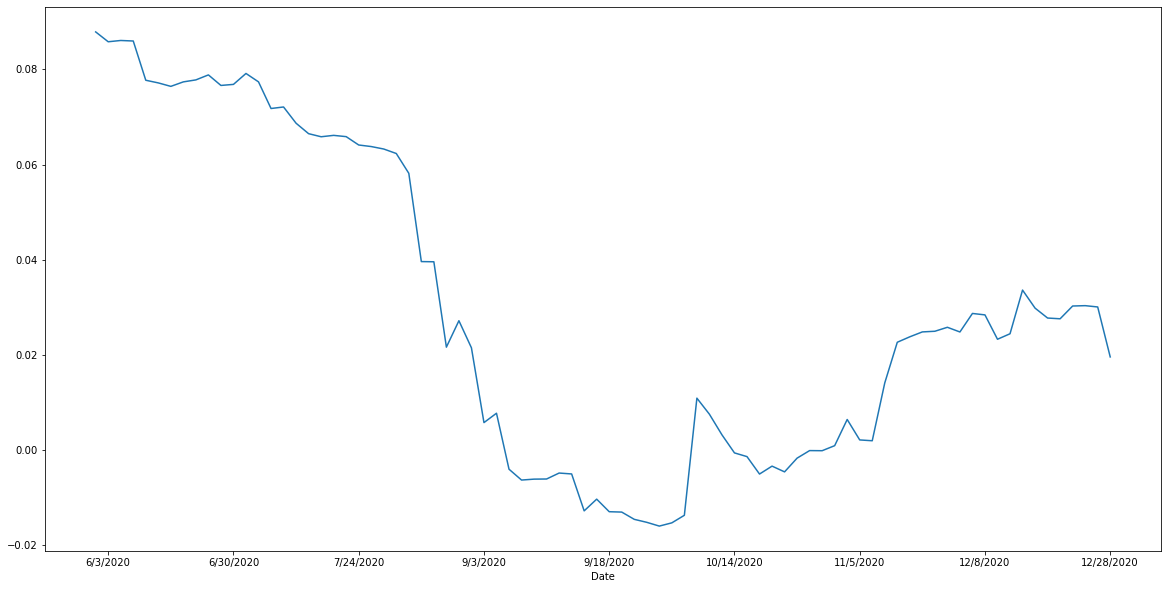

In [158]:
# Calculate and plot Beta

covariance = joined_df["PZZA"].rolling(window=60).cov(joined_df["Portfolio Returns"])
covariance

variance = joined_df["Portfolio Returns"].rolling(window=60).var()
variance

beta = covariance / variance

beta.plot(figsize = (20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [130]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))
sharpe_ratios

APPB                      NaN
DLTR                 0.785683
PZZA                 1.198915
Portfolio Returns         NaN
dtype: float64

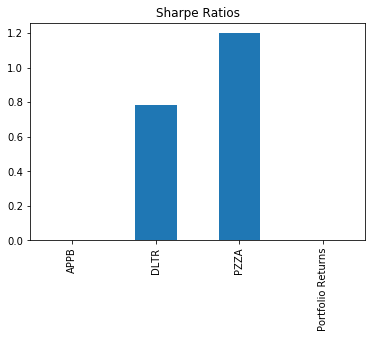

In [131]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
### How does your portfolio do?

# Write your answer here! Papa John(PZZA) and Dollar Tree(DLTR) out performs AppleBees. Having equal values of each stock does not help the portfolio do well. 